> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: What is it specifically that makes wine higher quality than others?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



#### The data set that I used is from Kaggle.com and it is about red wine and different compounds within in and the quality in which the wines are rated from opinions from tasters. The data set can be found at  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009


In [3]:

#Shows the first 10 observations in this dataset
df = pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
#Shows the number of columns and rows in this dataset, 
#there are 1599 rows and 12 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Cleaning, check if there are null data and add features if necessary

In [4]:
#There are no missing values in the dataset
np.where(pd.isnull(df)) 

(array([], dtype=int64), array([], dtype=int64))

In [7]:
#added a id for each of the wine based on the index 
wine_list = ['wine' + str(i) for i in range(len(df))]
df['wine_id'] = wine_list

In [5]:
#new dataframe, now with 13 columns and 1599 rows
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,wine0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,wine1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,wine2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,wine3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,wine4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,wine5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,wine6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,wine7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,wine8
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,wine9


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Research question 1:  What is the range of values of each features that affect the wine's quality?
#### For this question, I will make a histogram to show the distribution, find minimum, maximum, standard deviation and average of each feature. Then I will find the wines that have outliers in each feature then list the wines that are outliers. 

In [4]:
#function to print stats

def print_stats(column):
    print("mean: " + str(column.mean()))
    print("standard deviation: " + str(column.std()))
    print("max: " + str(column.max()))
    print("min: " + str(column.min()))
        

In [68]:
#function to find and print which features are outliers in which wines

def find_outliers(column):
    q25, q75 = np.percentile(column, 25), np.percentile(column, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = []
    for index, value in enumerate(column):
        if value < lower or value > upper:
            outliers.append("wine" + str(index))
    
                    
    print("There are " + str(len(outliers)) + " outliers in the category of " + 
          column.name + ": " + str(outliers))

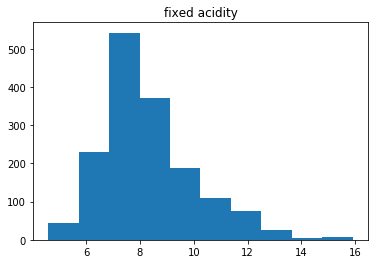

mean: 8.3196372733
standard deviation: 1.74109631813
max: 15.9
min: 4.6
There are 49 outliers in the category of fixed acidity: ['wine205', 'wine206', 'wine243', 'wine244', 'wine264', 'wine294', 'wine328', 'wine338', 'wine339', 'wine347', 'wine353', 'wine359', 'wine363', 'wine364', 'wine366', 'wine374', 'wine381', 'wine391', 'wine394', 'wine409', 'wine429', 'wine440', 'wine442', 'wine446', 'wine470', 'wine472', 'wine509', 'wine510', 'wine516', 'wine538', 'wine544', 'wine548', 'wine554', 'wine555', 'wine557', 'wine559', 'wine560', 'wine564', 'wine565', 'wine596', 'wine599', 'wine601', 'wine603', 'wine611', 'wine652', 'wine680', 'wine811', 'wine814', 'wine1224']


In [69]:
plt.title('fixed acidity')
plt.hist(df['fixed acidity'])
plt.show()

print_stats(df["fixed acidity"])
find_outliers(df['fixed acidity'])

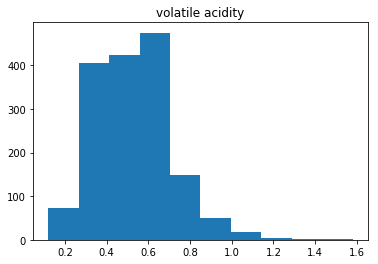

mean: 0.527820512821
standard deviation: 0.179059704154
max: 1.58
min: 0.12
There are 19 outliers in the category of volatile acidity: ['wine38', 'wine94', 'wine120', 'wine126', 'wine127', 'wine134', 'wine199', 'wine553', 'wine672', 'wine690', 'wine700', 'wine705', 'wine710', 'wine724', 'wine899', 'wine1261', 'wine1299', 'wine1312', 'wine1467']


In [70]:
plt.title('volatile acidity')
plt.hist(df['volatile acidity'])
plt.show()

print_stats(df["volatile acidity"])
find_outliers(df['volatile acidity'])

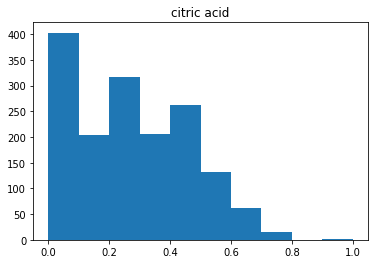

mean: 0.270975609756
standard deviation: 0.194801137405
max: 1.0
min: 0.0
There are 1 outliers in the category of citric acid: ['wine151']


In [71]:
plt.title('citric acid')
plt.hist(df['citric acid'])
plt.show()

print_stats(df["citric acid"])
find_outliers(df['citric acid'])

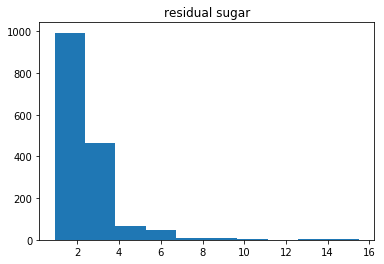

mean: 2.53880550344
standard deviation: 1.40992805951
max: 15.5
min: 0.9
There are 155 outliers in the category of residual sugar: ['wine9', 'wine11', 'wine14', 'wine15', 'wine18', 'wine33', 'wine35', 'wine39', 'wine40', 'wine55', 'wine57', 'wine64', 'wine65', 'wine154', 'wine155', 'wine156', 'wine157', 'wine163', 'wine164', 'wine192', 'wine215', 'wine269', 'wine270', 'wine271', 'wine272', 'wine274', 'wine275', 'wine277', 'wine278', 'wine279', 'wine283', 'wine324', 'wine325', 'wine327', 'wine353', 'wine364', 'wine366', 'wine374', 'wine375', 'wine378', 'wine395', 'wine396', 'wine400', 'wine408', 'wine409', 'wine413', 'wine415', 'wine442', 'wine455', 'wine480', 'wine484', 'wine494', 'wine501', 'wine502', 'wine510', 'wine515', 'wine516', 'wine538', 'wine539', 'wine541', 'wine554', 'wine555', 'wine556', 'wine557', 'wine558', 'wine559', 'wine564', 'wine595', 'wine606', 'wine608', 'wine624', 'wine625', 'wine645', 'wine649', 'wine652', 'wine659', 'wine690', 'wine705', 'wine719', 'wine740', 'w

In [72]:
plt.title('residual sugar')
plt.hist(df['residual sugar'])
plt.show()

print_stats(df["residual sugar"])
find_outliers(df['residual sugar'])

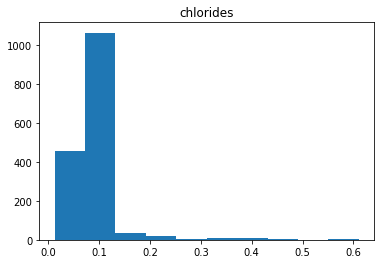

mean: 0.0874665415885
standard deviation: 0.0470653020101
max: 0.611
min: 0.012
There are 112 outliers in the category of chlorides: ['wine14', 'wine15', 'wine17', 'wine19', 'wine38', 'wine42', 'wine81', 'wine83', 'wine106', 'wine109', 'wine120', 'wine125', 'wine147', 'wine151', 'wine169', 'wine181', 'wine210', 'wine226', 'wine240', 'wine258', 'wine281', 'wine291', 'wine303', 'wine307', 'wine308', 'wine326', 'wine330', 'wine331', 'wine335', 'wine353', 'wine368', 'wine375', 'wine396', 'wine400', 'wine408', 'wine418', 'wine447', 'wine451', 'wine482', 'wine483', 'wine512', 'wine515', 'wine517', 'wine549', 'wine566', 'wine567', 'wine568', 'wine614', 'wine618', 'wine624', 'wine625', 'wine638', 'wine666', 'wine688', 'wine689', 'wine692', 'wine695', 'wine730', 'wine754', 'wine773', 'wine774', 'wine776', 'wine777', 'wine780', 'wine795', 'wine796', 'wine797', 'wine808', 'wine832', 'wine833', 'wine836', 'wine837', 'wine861', 'wine882', 'wine910', 'wine916', 'wine958', 'wine1014', 'wine1020', 'wi

In [73]:
plt.title('chlorides')
plt.hist(df['chlorides'])
plt.show()

print_stats(df["chlorides"])
find_outliers(df['chlorides'])

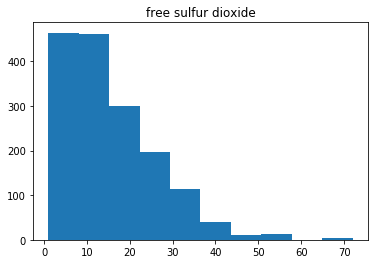

mean: 15.8749218261
standard deviation: 10.4601569698
max: 72.0
min: 1.0
There are 30 outliers in the category of free sulfur dioxide: ['wine14', 'wine15', 'wine57', 'wine396', 'wine400', 'wine497', 'wine522', 'wine584', 'wine634', 'wine678', 'wine925', 'wine926', 'wine982', 'wine1075', 'wine1131', 'wine1154', 'wine1156', 'wine1175', 'wine1217', 'wine1231', 'wine1244', 'wine1256', 'wine1295', 'wine1296', 'wine1358', 'wine1434', 'wine1435', 'wine1474', 'wine1476', 'wine1558']


In [74]:
plt.title('free sulfur dioxide')
plt.hist(df['free sulfur dioxide'])
plt.show()

print_stats(df["free sulfur dioxide"])
find_outliers(df['free sulfur dioxide'])

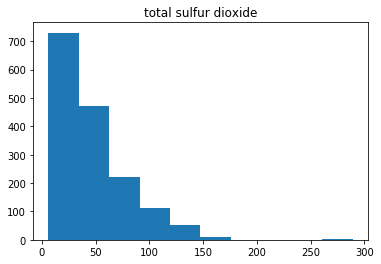

mean: 46.4677923702
standard deviation: 32.8953244783
max: 289.0
min: 6.0
There are 55 outliers in the category of total sulfur dioxide: ['wine14', 'wine15', 'wine86', 'wine88', 'wine90', 'wine91', 'wine92', 'wine109', 'wine130', 'wine145', 'wine154', 'wine155', 'wine156', 'wine157', 'wine188', 'wine189', 'wine190', 'wine192', 'wine201', 'wine219', 'wine313', 'wine354', 'wine396', 'wine400', 'wine415', 'wine417', 'wine463', 'wine515', 'wine522', 'wine523', 'wine591', 'wine636', 'wine637', 'wine649', 'wine651', 'wine672', 'wine684', 'wine694', 'wine723', 'wine741', 'wine771', 'wine772', 'wine791', 'wine1079', 'wine1081', 'wine1131', 'wine1244', 'wine1400', 'wine1401', 'wine1419', 'wine1493', 'wine1496', 'wine1559', 'wine1560', 'wine1561']


In [75]:
plt.title('total sulfur dioxide')
plt.hist(df['total sulfur dioxide'])
plt.show()

print_stats(df["total sulfur dioxide"])
find_outliers(df['total sulfur dioxide'])

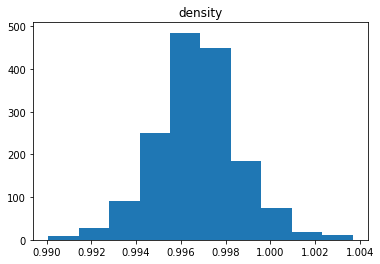

mean: 0.996746679174
standard deviation: 0.00188733395384
max: 1.00369
min: 0.99007
There are 45 outliers in the category of density: ['wine142', 'wine144', 'wine294', 'wine324', 'wine325', 'wine353', 'wine354', 'wine364', 'wine366', 'wine374', 'wine381', 'wine391', 'wine415', 'wine442', 'wine480', 'wine538', 'wine554', 'wine555', 'wine557', 'wine559', 'wine564', 'wine588', 'wine591', 'wine608', 'wine695', 'wine821', 'wine836', 'wine837', 'wine889', 'wine999', 'wine1017', 'wine1018', 'wine1114', 'wine1122', 'wine1126', 'wine1228', 'wine1269', 'wine1270', 'wine1298', 'wine1434', 'wine1435', 'wine1474', 'wine1475', 'wine1476', 'wine1477']


In [76]:
plt.title('density')
plt.hist(df['density'])
plt.show()

print_stats(df["density"])
find_outliers(df['density'])

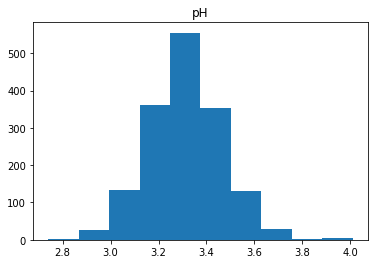

mean: 3.31111319575
standard deviation: 0.154386464904
max: 4.01
min: 2.74
There are 35 outliers in the category of pH: ['wine45', 'wine94', 'wine95', 'wine151', 'wine268', 'wine276', 'wine440', 'wine544', 'wine553', 'wine554', 'wine555', 'wine557', 'wine588', 'wine614', 'wine650', 'wine656', 'wine657', 'wine695', 'wine821', 'wine930', 'wine934', 'wine996', 'wine997', 'wine1017', 'wine1018', 'wine1111', 'wine1270', 'wine1300', 'wine1316', 'wine1319', 'wine1321', 'wine1377', 'wine1470', 'wine1488', 'wine1491']


In [77]:
plt.title('pH')
plt.hist(df['pH'])
plt.show()

print_stats(df["pH"])
find_outliers(df['pH'])

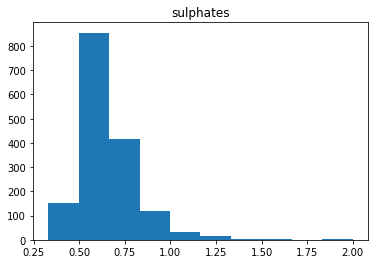

mean: 0.658148843027
standard deviation: 0.16950697959
max: 2.0
min: 0.33
There are 59 outliers in the category of sulphates: ['wine13', 'wine17', 'wine19', 'wine43', 'wine79', 'wine81', 'wine83', 'wine86', 'wine88', 'wine91', 'wine92', 'wine106', 'wine151', 'wine161', 'wine169', 'wine181', 'wine201', 'wine226', 'wine240', 'wine258', 'wine281', 'wine338', 'wine339', 'wine340', 'wine369', 'wine372', 'wine376', 'wine377', 'wine415', 'wine451', 'wine477', 'wine482', 'wine483', 'wine503', 'wine504', 'wine506', 'wine515', 'wine586', 'wine614', 'wine639', 'wine689', 'wine692', 'wine723', 'wine754', 'wine795', 'wine852', 'wine1051', 'wine1158', 'wine1165', 'wine1260', 'wine1288', 'wine1289', 'wine1319', 'wine1367', 'wine1370', 'wine1371', 'wine1372', 'wine1403', 'wine1408']


In [78]:
plt.title('sulphates')
plt.hist(df['sulphates'])
plt.show()

print_stats(df["sulphates"])
find_outliers(df['sulphates'])

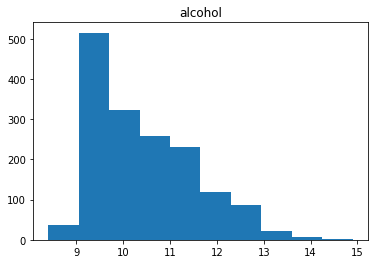

mean: 10.4229831144
standard deviation: 1.06566758185
max: 14.9
min: 8.4
There are 13 outliers in the category of alcohol: ['wine142', 'wine144', 'wine467', 'wine588', 'wine652', 'wine821', 'wine1114', 'wine1132', 'wine1228', 'wine1269', 'wine1270', 'wine1475', 'wine1477']


In [79]:
plt.title('alcohol')
plt.hist(df['alcohol'])
plt.show()

print_stats(df["alcohol"])
find_outliers(df['alcohol'])

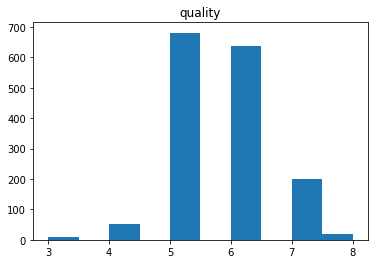

mean: 5.63602251407
standard deviation: 0.807569439735
max: 8
min: 3
There are 28 outliers in the category of quality: ['wine267', 'wine278', 'wine390', 'wine440', 'wine455', 'wine459', 'wine481', 'wine495', 'wine498', 'wine517', 'wine588', 'wine690', 'wine828', 'wine832', 'wine899', 'wine1061', 'wine1090', 'wine1120', 'wine1202', 'wine1269', 'wine1299', 'wine1374', 'wine1403', 'wine1449', 'wine1469', 'wine1478', 'wine1505', 'wine1549']


In [80]:
plt.title('quality')
plt.hist(df['quality'])
plt.show()

print_stats(df["quality"])
find_outliers(df['quality'])

### Research Question 2: Which features have the strongest correlation for high quality?
#### For this question, I will only choose the wines with quality rated at 7 and 8 then get the correlation coefficient with other features in the data, then visualize the findings with a heatmap.

In [86]:
#create data frame only with wines of quality 7 and 8

wine_hq = df.loc[df['quality'].isin([7,8])]

In [87]:
#create correlation matrix of the high quality wines

hq_corr = wine_hq.corr()

In [88]:
#shows high quality wine's correlation with other features

hq_corr['quality']

fixed acidity          -0.042254
volatile acidity        0.037022
citric acid             0.022656
residual sugar         -0.028967
chlorides              -0.079045
free sulfur dioxide    -0.020729
total sulfur dioxide   -0.013373
density                -0.112030
pH                     -0.042111
sulphates               0.054699
alcohol                 0.174075
quality                 1.000000
Name: quality, dtype: float64

In [89]:
#make visualization bigger

plt.rcParams['figure.figsize'] = [20, 15]

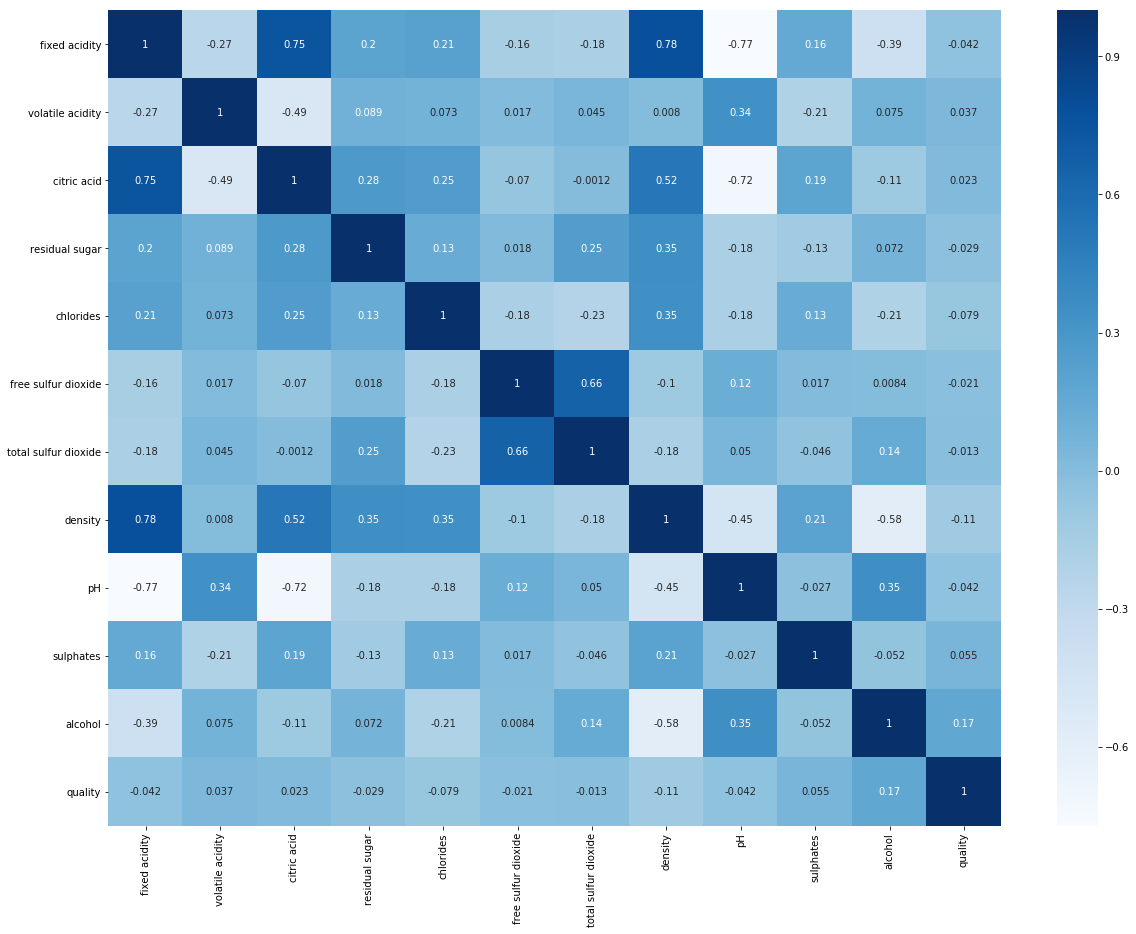

In [90]:
#shows heat map of the high quality wines, made from the correlation matrix

wine_hq_hm = sns.heatmap(wine_hq.corr(), cmap="Blues", annot =True)

### Research Question 2: Which features have the strongest correlation for low quality?
#### For this question, I will only choose the wines with quality rated at 3 and 4 then get the correlation coefficient with other features in the data, then visualize the findings with a heatmap.

In [81]:
#create data frame only with wines of quality 3 and 4

wine_lq = df.loc[df['quality'].isin([3,4])]

In [82]:
#create correlation matrix of the low quality wines

lq_corr = wine_lq.corr()

In [83]:
#shows low quality wine's correlation with other features

lq_corr['quality']

fixed acidity          -0.129709
volatile acidity       -0.283044
citric acid             0.005596
residual sugar          0.012681
chlorides              -0.156034
free sulfur dioxide     0.051304
total sulfur dioxide    0.158330
density                -0.203671
pH                     -0.034691
sulphates               0.043376
alcohol                 0.124405
quality                 1.000000
Name: quality, dtype: float64

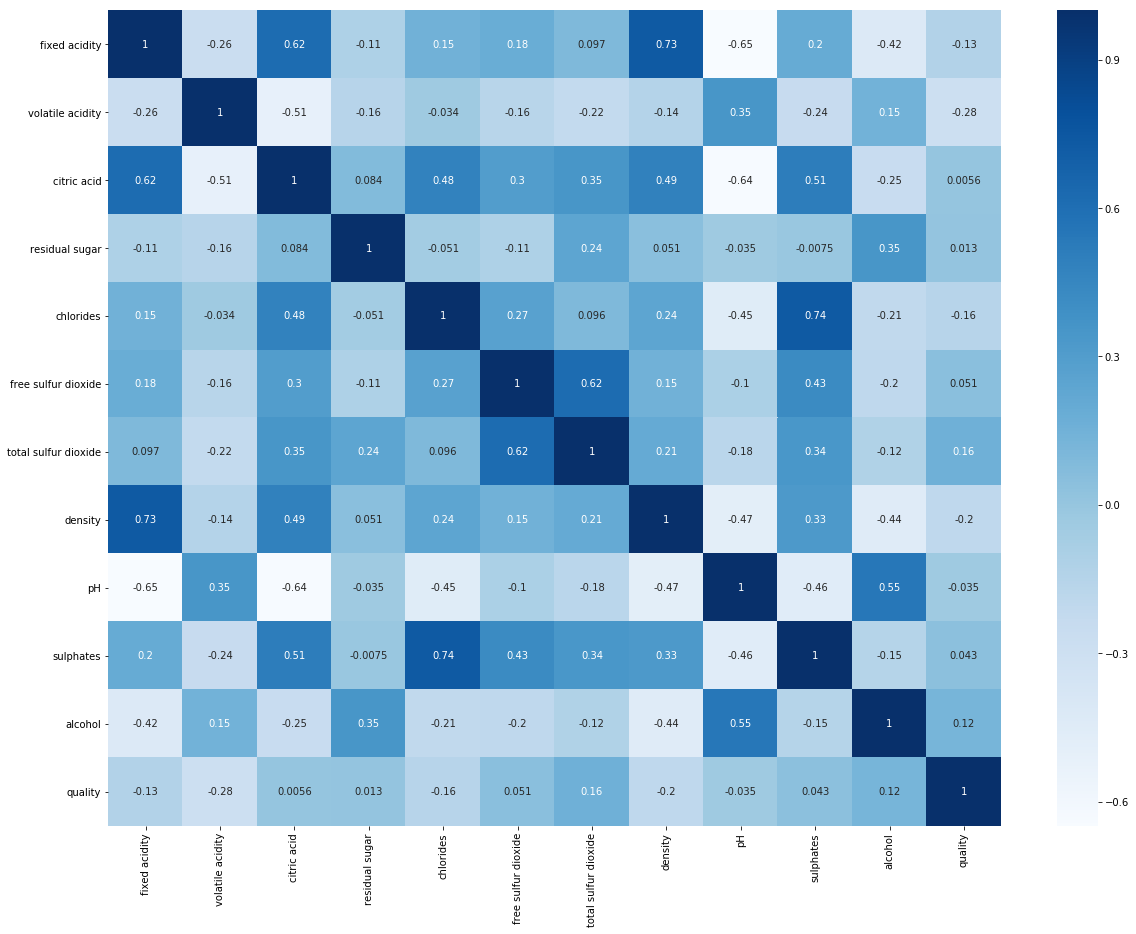

In [91]:
#shows heat map of the low quality wines, made from the correlation matrix

wine_lq_hm = sns.heatmap(wine_lq.corr(), cmap="Blues", annot =True)

## Limitations 

#### This dataset does not have any missing values that might influence the results. There are outliers in each features and I have listed them in above analysis. I did not take out any outliers because they are part of the presentation about what makes red wines receive good quality ratings while some receive bad ratings. 

#### The statistical tests that I ran was the correlation coefficient between the quality rating and the other features. I have found that there are only a few significant features with high positive and negative correlations that attribute to the rating of the wine. Alcohol content was the feature that had the highest positive correlation with both high and low quality, with +0.17 for high quality and +0.12 for low quality. So i am guessing how strong or weak a wine is will attribute to how people will rate it. For negative correlations, volatile acidity had the biggest coefficient with -0.28, so in a way it contributes to better quality wine as it is inversely correlated. 

## Conclusion to Question 1: 

#### Each feature has its own number of wine that has it as outliers, and the number of wines in each feature can range from 1 to 155, while most features have outliers in the range of 20-50. Features have a distribution of some as right skewed while some are normally distributed, there are no features with a left skewed distribution. 



## Conclusion to Question 2:

#### According to the heatmap and correlation matrix, the features that are most positively correlated with high quality are alcohol with + 0.174075, sulphates with +0.054699, and volatile acidity with+ 0.037022.

#### The features that are most negatively correlated with high quality are density                with -0.112030, chlorides with -0.07904, and fixed acidity with -0.042254.


## Conclusion to Question 2:

#### According to the heatmap and correlation matrix, the features that are most positively correlated with low quality are alcohol with +0.124405, total sulfur dioxide    with +0.158330, and free sulfur dioxide with +0.051304. 

#### The features that are most negatively correlated with low quality are volatile acidity with -0.283044, density with -0.203671, and chlorides with -0.156034

<a id='conclusions'></a>


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])